#Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Feynn Lab/Project 2/Electric vehicle sales_Fame2.csv')
data

,State,Direction,2 Wheelers,3 Wheelers,4 Wheelers
0,Jammu Kashmir,North,2481,130,0
1,Arunachal Pradesh,North,1,1,0
2,Himachal Pradesh,North,879,172,0
3,The Dadra and Nagar Haveli and Daman and Diu,North,62,24,0
4,Ladakh,North,20,0,0
5,Punjab,North,8376,261,3
6,Haryana,North,12656,213,272
7,Chandigarh,North,622,76,0
8,Delhi,North,30323,9378,2239
9,Uttarakhand,North,4289,2789,21


# EDA of complete dataset

In [3]:
vehicle_type = ['2 Wheelers', '3 Wheelers', '4 Wheelers']

In [ ]:
data[vehicle_type].sum()

2 Wheelers    553145
3 Wheelers     59925
4 Wheelers      4478
dtype: int64

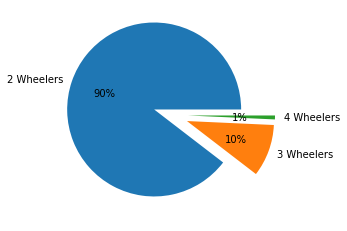

In [ ]:
plt.pie(data[vehicle_type].sum(),labels=vehicle_type, explode=[0.2,0.2,0.2], autopct='%.f%%')
plt.show()

90% of Evs sold are 2 wheelers. It seems many have taken advantage of this scheme for privately owned vehicle

In [ ]:
data.describe()

,2 Wheelers,3 Wheelers,4 Wheelers
count,36.000000,36.000000,36.000000
mean,15365.138889,1664.583333,124.388889
std,23443.555256,2539.720630,400.848976
min,1.000000,0.000000,0.000000
25%,60.000000,20.500000,0.000000
50%,4811.500000,869.000000,2.500000
75%,21987.750000,2294.750000,28.750000
max,91971.000000,11283.000000,2239.000000


The average sales of 2 Wheelers is 15000, of 3 Wheelers is 1600 and of 4 Wheelers is 120

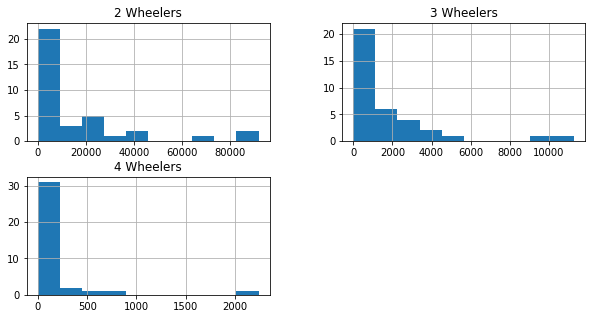

In [ ]:
data.hist(figsize=(10,5))
plt.show()

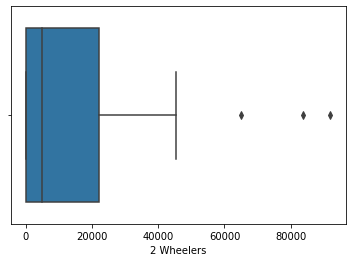

In [ ]:
sns.boxplot(data['2 Wheelers'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


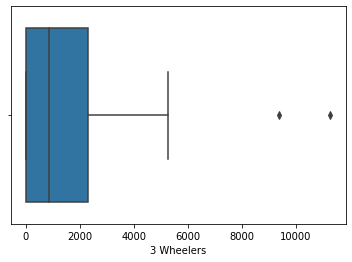

In [ ]:
sns.boxplot(data['3 Wheelers'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


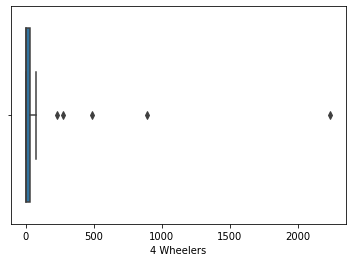

In [ ]:
sns.boxplot(data['4 Wheelers'])

The 4 Wheelers data is highly skewed. There is some outliers with high sales of 4 wheelers

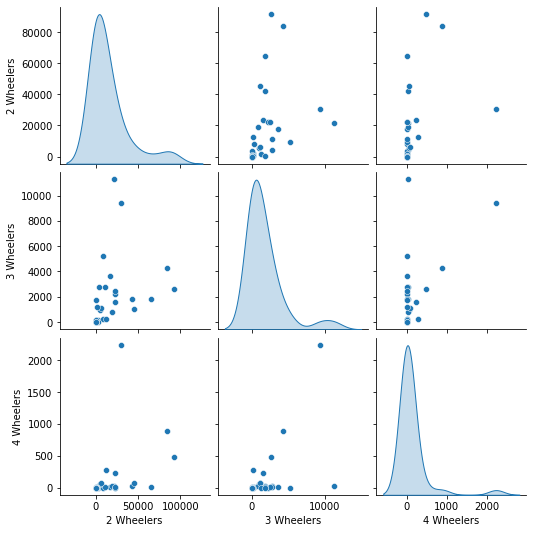

In [ ]:
sns.pairplot(data, diag_kind='kde')

It seems there are 2 clusters, one with averages sales of vehicles and some regions with high sales

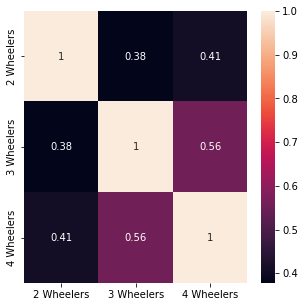

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True)

There is no correlation between sales of different types of EVs

#EDA region wise

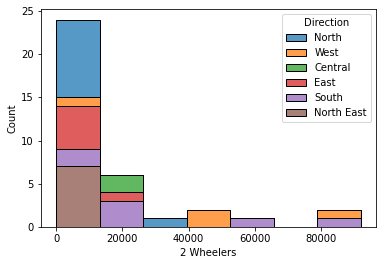

In [ ]:
sns.histplot(data=data, x='2 Wheelers', hue='Direction', multiple='stack')

Some states in west and south have high number of sales of 2 wheelers around 80,000

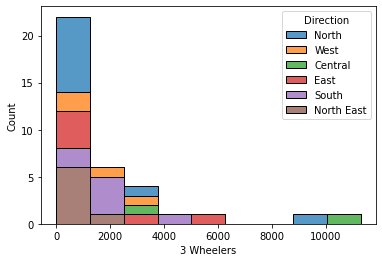

In [ ]:
sns.histplot(data=data, x='3 Wheelers', hue='Direction', multiple='stack')

Some of the states in the northern and central region have high sales of 3 wheelers around 10,000

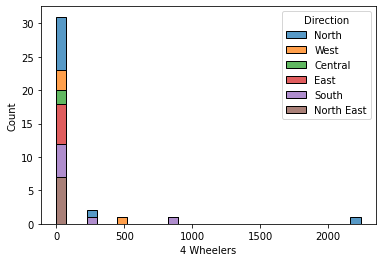

In [ ]:
sns.histplot(data=data, x='4 Wheelers', hue='Direction', multiple='stack', bins=30)

Some states in North have very high sales of 4 wheelers aroung 2500

In [ ]:
data.groupby(['Direction']).mean()

,2 Wheelers,3 Wheelers,4 Wheelers
Direction,,,
Central,19629.500000,7449.500000,21.000000
East,8531.666667,1809.000000,28.833333
North,5970.900000,1304.400000,253.500000
North East,251.428571,450.428571,0.142857
South,31160.285714,1775.285714,164.000000
West,45776.250000,1387.000000,144.750000


In [ ]:
data_D = data.groupby(['Direction'], as_index=False).sum()
data_D

,Direction,2 Wheelers,3 Wheelers,4 Wheelers
0,Central,39259,14899,42
1,East,51190,10854,173
2,North,59709,13044,2535
3,North East,1760,3153,1
4,South,218122,12427,1148
5,West,183105,5548,579


In [ ]:
data_D.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0     54200
1     62217
2     75288
3      4908
4    231697
5    189232
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


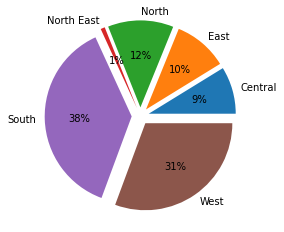

In [ ]:
plt.pie(x=data_D.sum(axis=1), labels=data_D['Direction'], explode=[0.1,0.1,0.1,0.1,0.1,0.1], autopct='%.f%%')
plt.show()

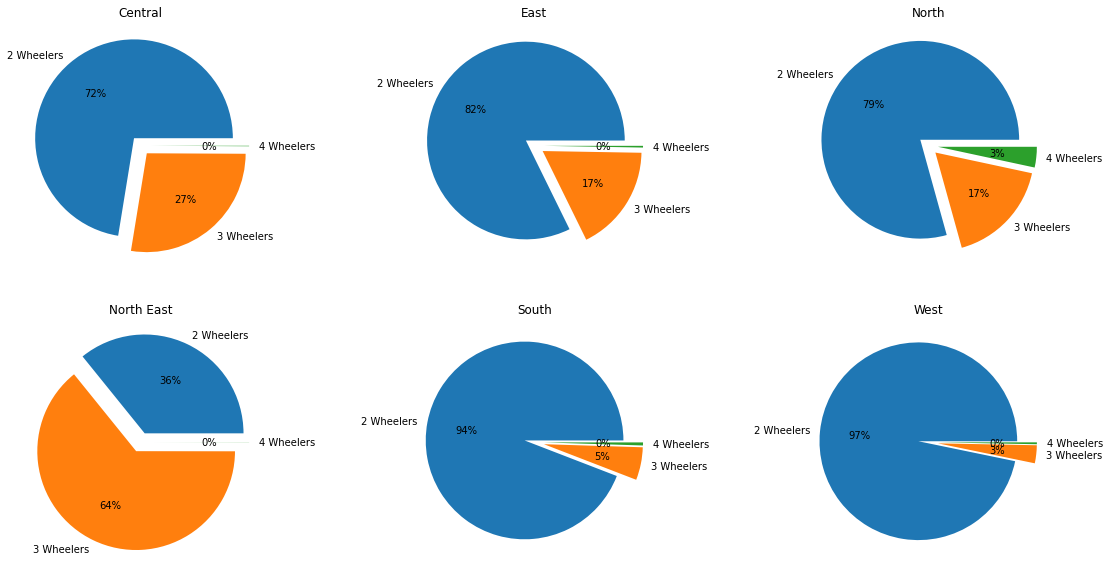

In [ ]:
plt.figure(figsize=(20,10))

for i in data_D.index:
  plt.subplot(2,3,i+1)
  plt.pie(x=data_D.iloc[i,1:], labels=vehicle_type, explode=[0.1,0.1,0.1], autopct='%.f%%')
  plt.title(data_D.iloc[i,0])

plt.show()

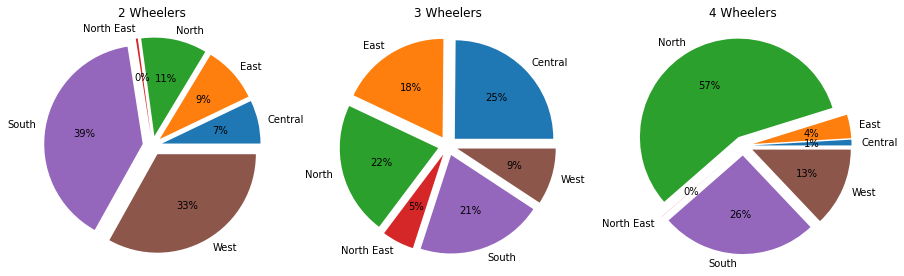

In [ ]:
plt.figure(figsize=(15,10))

for i in range(0,3):
  plt.subplot(1,3,i+1)
  plt.pie(x=data_D.iloc[:,i+1], labels=data_D['Direction'], explode=[0.1,0.1,0.1,0.1,0.1,0.1], autopct='%.f%%')
  plt.title(data_D.columns[i+1])

plt.show()

Sales of EVs are high in South and West India comapred to other regions.

Sales of 2 wheelers is high in south and west.

Sales of 3 wheelers are high in east, north and south.

Sales of 4 wheelers are high in north.

#EDA statewise

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.6 MB/s 
     |████████████████████████████████| 16.7 MB 33.8 MB/s 
     |████████████████████████████████| 6.3 MB 43.5 MB/s 


In [ ]:
pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
map_df = gpd.read_file('/content/drive/MyDrive/Feynn Lab/Project 2/Maps_with_python-master')

In [ ]:
data.replace({'Jammu Kashmir':'Jammu and Kashmir', 'The Dadra and Nagar Haveli and Daman and Diu':'Dadra and Nagar Haveli'}, inplace=True)

In [ ]:
data_totalEV = data[vehicle_type].sum(axis=1)
data_totalEV = pd.DataFrame(data_totalEV, columns=['TotalEVs'])
data_totalEV['State'] = data['State']

In [ ]:
merged = map_df.set_index('st_nm').join(data_totalEV.set_index('State'))
print(data_totalEV.shape)
print(merged.shape)

(36, 2)
(37, 3)


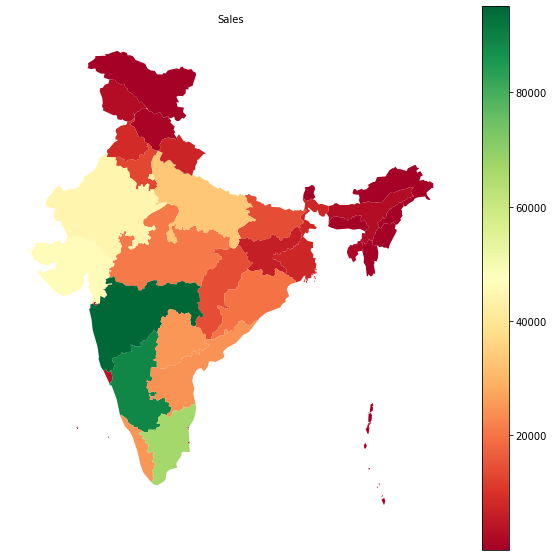

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Sales', fontdict={'fontsize': '10', 'fontweight' : '10'})
merged.plot(column='TotalEVs', legend=True, ax=ax, cmap='RdYlGn')

Sales are high in southern, western and central region of India

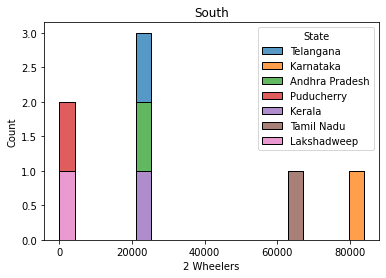

In [ ]:
sns.histplot(data[data['Direction']=='South'], x='2 Wheelers', hue='State', multiple='stack', bins=20)
plt.title('South')
plt.show()

High Sales of 2 wheelers are in Karnataka and Tamil Nadu in southern region

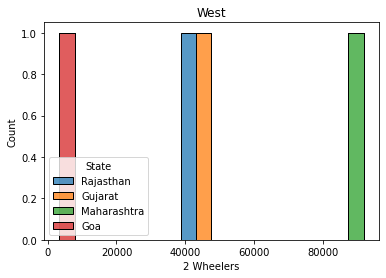

In [ ]:
sns.histplot(data[data['Direction']=='West'], x='2 Wheelers', hue='State', multiple='stack', bins=20)
plt.title('West')
plt.show()

High sales of 2 wheelers is in Maharashtra in western region

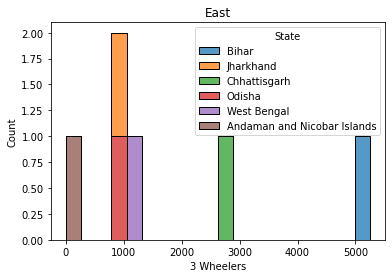

In [ ]:
sns.histplot(data[data['Direction']=='East'], x='3 Wheelers', hue='State', multiple='stack', bins=20)
plt.title('East')
plt.show()

High sales of 3 wheelers is in Bihar in eastern region

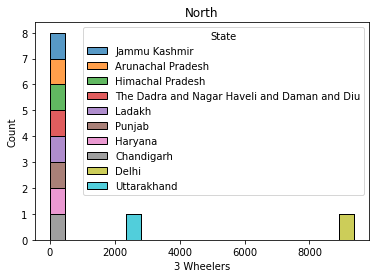

In [ ]:
sns.histplot(data[data['Direction']=='North'], x='3 Wheelers', hue='State', multiple='stack', bins=20)
plt.title('North')
plt.show()

High sales of 3 wheelers is in Delhi in northern region

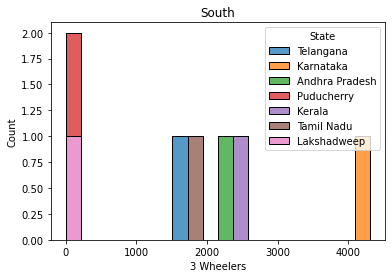

In [ ]:
sns.histplot(data[data['Direction']=='South'], x='3 Wheelers', hue='State', multiple='stack', bins=20)
plt.title('South')
plt.show()

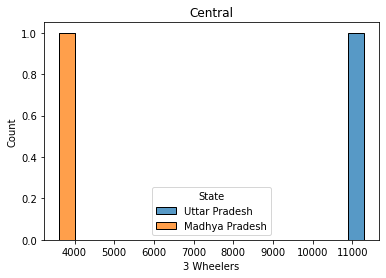

In [5]:
sns.histplot(data[data['Direction']=='Central'], x='3 Wheelers', hue='State', multiple='stack', bins=20)
plt.title('Central')
plt.show()

High sales of 3 wheelers is in Uttar Pradesh in Central region

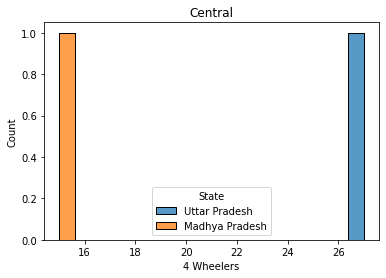

In [6]:
sns.histplot(data[data['Direction']=='Central'], x='4 Wheelers', hue='State', multiple='stack', bins=20)
plt.title('Central')
plt.show()

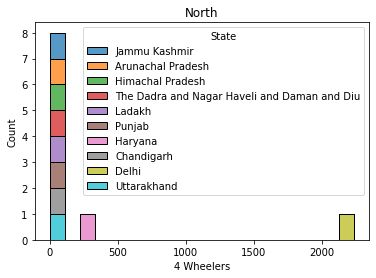

In [ ]:
sns.histplot(data[data['Direction']=='North'], x='4 Wheelers', hue='State', multiple='stack', bins=20)
plt.title('North')
plt.show()

High sales of 4 wheelers are observed only in Delhi and Haryana

#Segmentation

In [ ]:
from scipy.stats import zscore
dataS = data.iloc[:,2:].apply(zscore)

In [ ]:
dataS.describe()

,2 Wheelers,3 Wheelers,4 Wheelers
count,3.600000e+01,3.600000e+01,3.600000e+01
mean,-2.158767e-17,-6.167906e-18,2.467162e-17
std,1.014185e+00,1.014185e+00,1.014185e+00
min,-6.646637e-01,-6.647171e-01,-3.147154e-01
25%,-6.621113e-01,-6.565308e-01,-3.147154e-01
50%,-4.565580e-01,-3.176998e-01,-3.083902e-01
75%,2.864989e-01,2.516441e-01,-2.419753e-01
max,3.314025e+00,3.840917e+00,5.350162e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8c5158950>,
      dtype=object)

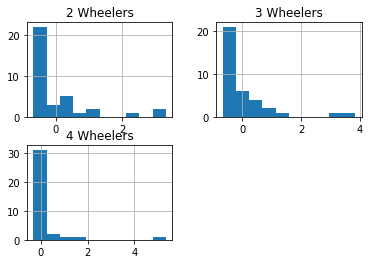

In [ ]:
dataS.hist()

##K Means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

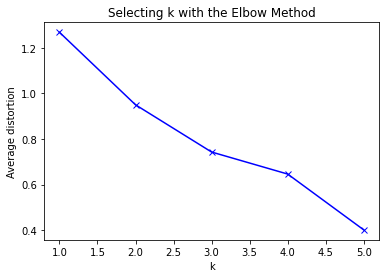

In [ ]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,6)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataS)
    prediction=model.predict(dataS)
    meanDistortions.append(sum(np.min(cdist(dataS, model.cluster_centers_, 'euclidean'), axis=1)) / dataS.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

From Elbow method we can see that ideal number of clusters are 2 or 3

##K=2

In [ ]:
model = KMeans(2)
clusters = model.fit_predict(dataS)

In [ ]:
data['Group'] = clusters.astype(object)
data

,State,Direction,2 Wheelers,3 Wheelers,4 Wheelers,Group
0,Jammu and Kashmir,North,2481,130,0,0
1,Arunachal Pradesh,North,1,1,0,0
2,Himachal Pradesh,North,879,172,0,0
3,Dadra and Nagar Haveli,North,62,24,0,0
4,Ladakh,North,20,0,0,0
5,Punjab,North,8376,261,3,0
6,Haryana,North,12656,213,272,0
7,Chandigarh,North,622,76,0,0
8,Delhi,North,30323,9378,2239,1
9,Uttarakhand,North,4289,2789,21,0


In [ ]:
data.groupby('Group').mean()

,2 Wheelers,3 Wheelers,4 Wheelers
Group,,,
0,10161.34375,1010.84375,26.1875
1,56995.50000,6894.50000,910.0000


In [ ]:
data_C= data.groupby(['Group'], as_index=False).sum()
data_C

,Group,2 Wheelers,3 Wheelers,4 Wheelers
0,0,325163,32347,838
1,1,227982,27578,3640


In [ ]:
data_C.sum(axis=1)

0    358348
1    259201
dtype: int64

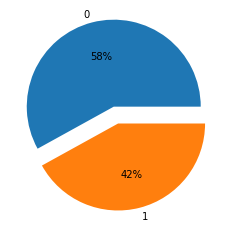

In [ ]:
plt.pie(x=data_C.sum(axis=1), labels=data_C['Group'], explode=[0.1,0.1], autopct='%.f%%')
plt.show()

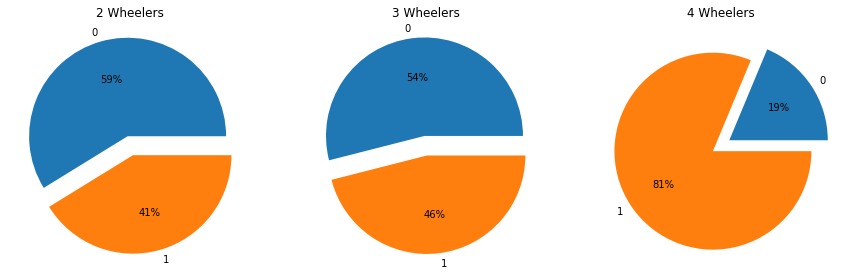

In [ ]:
plt.figure(figsize=(15,10))

for i in range(0,3):
  plt.subplot(1,3,i+1)
  plt.pie(x=data_C.iloc[:,i+1], labels=data_C['Group'], explode=[0.1,0.1], autopct='%.f%%')
  plt.title(data_C.columns[i+1])

plt.show()

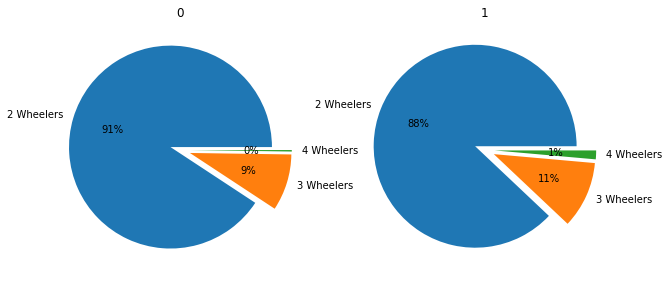

In [ ]:
plt.figure(figsize=(10,10))

for i in data_C.index:
  plt.subplot(1,2,i+1)
  plt.pie(x=data_C.iloc[i,1:], labels=vehicle_type, explode=[0.1,0.1,0.1], autopct='%.f%%')
  plt.title(data_C.iloc[i,0])

plt.show()

In [ ]:
merged = map_df.set_index('st_nm').join(data.set_index('State'))
print(data.shape)
print(merged.shape)

(36, 6)
(37, 7)


In [ ]:
merged['Group'] = merged['Group'].astype(object)

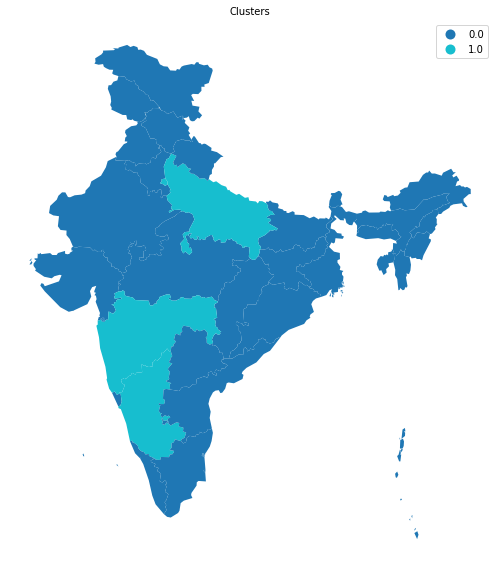

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Clusters', fontdict={'fontsize': '10', 'fontweight' : '10'})
merged.plot(column='Group', legend=True, ax=ax)

##K = 3

In [ ]:
model = KMeans(3)
clusters = model.fit_predict(dataS)

In [ ]:
data['Group'] = clusters.astype(object)
data

,State,Direction,2 Wheelers,3 Wheelers,4 Wheelers,Group
0,Jammu and Kashmir,North,2481,130,0,1
1,Arunachal Pradesh,North,1,1,0,1
2,Himachal Pradesh,North,879,172,0,1
3,Dadra and Nagar Haveli,North,62,24,0,1
4,Ladakh,North,20,0,0,1
5,Punjab,North,8376,261,3,1
6,Haryana,North,12656,213,272,1
7,Chandigarh,North,622,76,0,1
8,Delhi,North,30323,9378,2239,2
9,Uttarakhand,North,4289,2789,21,1


In [ ]:
data.groupby('Group').mean()

,2 Wheelers,3 Wheelers,4 Wheelers
Group,,,
0,80270.333333,2914.333333,462.666667
1,8392.483871,984.548387,26.580645
2,26083.500000,10330.500000,1133.000000


In [ ]:
data_C= data.groupby(['Group'], as_index=False).sum()
data_C

,Group,2 Wheelers,3 Wheelers,4 Wheelers
0,0,240811,8743,1388
1,1,260167,30521,824
2,2,52167,20661,2266


In [ ]:
data_C.sum(axis=1)

0    250942
1    291513
2     75096
dtype: int64

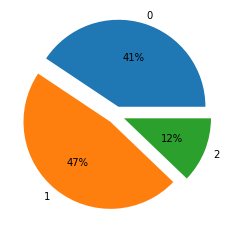

In [ ]:
plt.pie(x=data_C.sum(axis=1), labels=data_C['Group'], explode=[0.1,0.1,0.1], autopct='%.f%%')
plt.show()

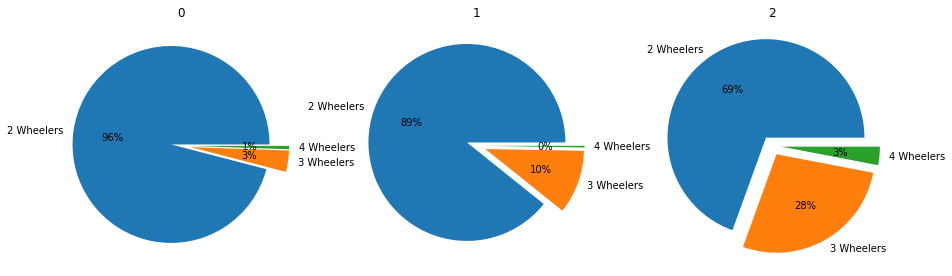

In [ ]:
plt.figure(figsize=(15,10))

for i in data_C.index:
  plt.subplot(1,3,i+1)
  plt.pie(x=data_C.iloc[i,1:], labels=vehicle_type, explode=[0.1,0.1,0.1], autopct='%.f%%')
  plt.title(data_C.iloc[i,0])

plt.show()

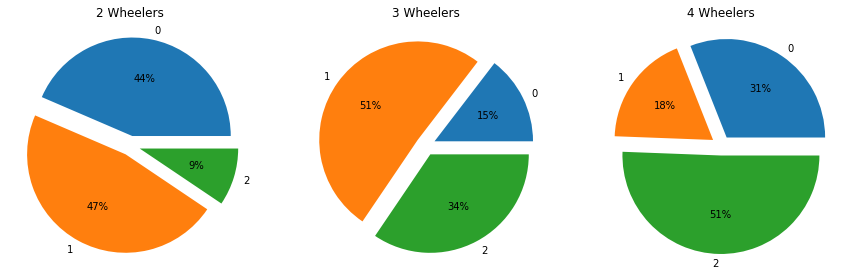

In [ ]:
plt.figure(figsize=(15,10))

for i in range(0,3):
  plt.subplot(1,3,i+1)
  plt.pie(x=data_C.iloc[:,i+1], labels=data_C['Group'], explode=[0.1,0.1,0.1], autopct='%.f%%')
  plt.title(data_C.columns[i+1])

plt.show()

The 1st segment corresponds to regions where there are high sales of 2 wheelers.
The 2nd segment corresponds to regions with average sales of all types of EVs.
The 3rd segment corresponds to regions with high sales of 3 & 4 wheelers.

In [ ]:
merged = map_df.set_index('st_nm').join(data.set_index('State'))

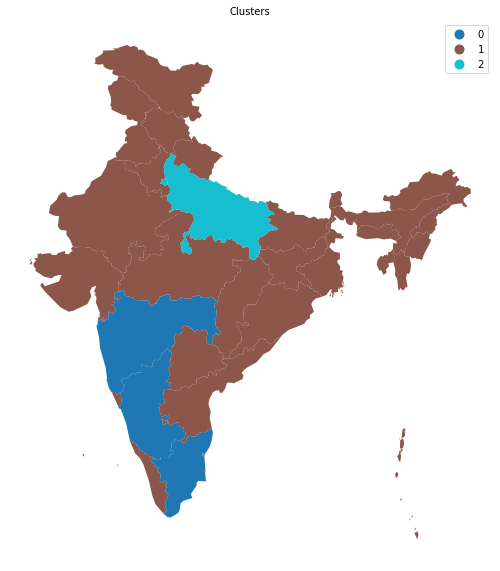

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Clusters', fontdict={'fontsize': '10', 'fontweight' : '10'})
merged.plot(column='Group', legend=True, ax=ax)